### Possible Issue

Mismatched output in Python CoreML vs CoreML on iOS.

https://github.com/apple/coremltools/issues/184

In [1]:
# Imports
import os
import sys
import numpy as np
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

import coremltools as ct
from coremltools.models.neural_network import quantization_utils

In [2]:
restore_path = "./model_parameter.pt"
valid_dir = "./kodak/"
y_hat_dir = "./y_hat/"

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [4]:
y_hat = np.load('./y_hat/0.npy')

In [5]:
ml_model = ct.models.MLModel('./test01_model.mlmodel')

In [6]:
ml_model

input {
  name: "y_hat"
  shortDescription: "Input Image"
  type {
    multiArrayType {
      shape: 1
      shape: 12
      shape: 128
      shape: 192
      dataType: FLOAT32
    }
  }
}
output {
  name: "pred"
  shortDescription: "Compressed Image Output"
  type {
    multiArrayType {
      shape: 1
      shape: 3
      shape: 512
      shape: 768
      dataType: FLOAT32
    }
  }
}
metadata {
  shortDescription: "FP-32 model."
  userDefined {
    key: "com.github.apple.coremltools.source"
    value: "onnx==1.7.0"
  }
  userDefined {
    key: "com.github.apple.coremltools.version"
    value: "4.0b1"
  }
}

In [7]:
y_hat.shape

(1, 12, 128, 192)

In [8]:
output = ml_model.predict({'y_hat': y_hat})

In [9]:
model_prediction = np.asarray(output['pred'])

In [10]:
model_prediction.shape

(1, 3, 512, 768)

In [11]:
model_prediction

array([[[[ 3.43750000e-01,  3.49365234e-01,  3.53027344e-01, ...,
           1.12670898e-01,  1.19323730e-01,  1.14379883e-01],
         [ 3.54980469e-01,  3.59375000e-01,  3.62304688e-01, ...,
           1.15234375e-01,  1.17309570e-01,  1.16455078e-01],
         [ 3.71093750e-01,  3.65478516e-01,  3.75244141e-01, ...,
           1.16149902e-01,  1.14501953e-01,  1.13403320e-01],
         ...,
         [ 1.35009766e-01,  1.35864258e-01,  1.25000000e-01, ...,
           1.68945312e-01,  1.52099609e-01,  9.25292969e-02],
         [ 1.41479492e-01,  1.24755859e-01,  1.22497559e-01, ...,
           1.20056152e-01,  1.07482910e-01,  9.33837891e-02],
         [-5.47027588e-03,  1.05321407e-04,  6.54983521e-03, ...,
          -3.50341797e-02, -2.39562988e-02, -7.33184814e-03]],

        [[ 4.51904297e-01,  4.54833984e-01,  4.62890625e-01, ...,
           1.54541016e-01,  1.57958984e-01,  1.53198242e-01],
         [ 4.67529297e-01,  4.69482422e-01,  4.74121094e-01, ...,
           1.56127930e

In [12]:
reshaped_output = np.squeeze(model_prediction, axis=0)
reshaped_output.shape

(3, 512, 768)

In [13]:
# Change the Dimensions of Image
reshaped_output = np.reshape(reshaped_output, (768, 512, 3))
reshaped_output.shape

(768, 512, 3)

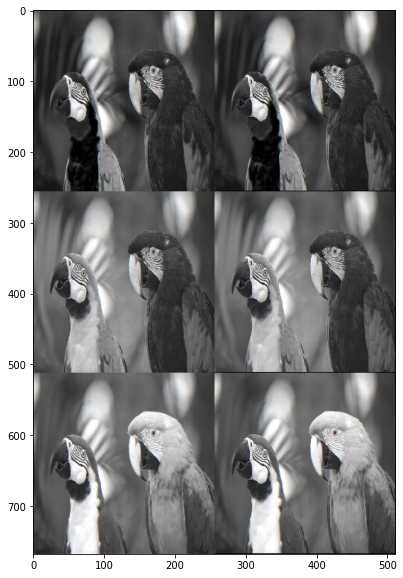

In [17]:
fog = plt.figure(figsize=(20,10))
plt.imshow(reshaped_output)

In [15]:
b, g, r = cv2.split(reshaped_output)
print(b, g, r)

[[ 3.43750000e-01  3.47656250e-01  3.50585938e-01 ...  1.35864258e-01
   1.23596191e-01  1.15234375e-01]
 [ 3.71093750e-01  3.77441406e-01  3.75488281e-01 ...  1.32690430e-01
   1.22314453e-01  1.15356445e-01]
 [ 3.96484375e-01  3.99902344e-01  3.90136719e-01 ...  1.37817383e-01
   1.25610352e-01  1.17248535e-01]
 ...
 [ 2.75634766e-01  2.62939453e-01  1.98120117e-01 ...  2.05688477e-01
   2.01538086e-01  2.29003906e-01]
 [ 2.43652344e-01  2.59277344e-01  2.26928711e-01 ...  1.93969727e-01
   2.01416016e-01  2.32788086e-01]
 [ 2.32299805e-01  2.57812500e-01  2.51708984e-01 ...  3.14235687e-04
  -4.29749489e-05  8.99791718e-04]] [[0.34936523 0.34838867 0.35180664 ... 0.1315918  0.12011719 0.11730957]
 [0.36547852 0.36547852 0.36767578 ... 0.13134766 0.1229248  0.10919189]
 [0.3864746  0.39501953 0.3935547  ... 0.12988281 0.11816406 0.11688232]
 ...
 [0.26635742 0.25073242 0.18371582 ... 0.20214844 0.20861816 0.22497559]
 [0.24743652 0.24963379 0.20129395 ... 0.18591309 0.1977539  0.2252

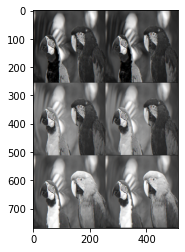

In [16]:
img = cv2.merge((b,g,r))
plt.imshow(img)